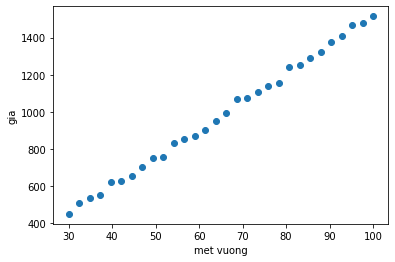

In [5]:
# data processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data_linear.csv').values
N,d = data.shape
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

plt.scatter(x,y)
plt.xlabel('met vuong')
plt.ylabel('gia')

x = np.hstack((np.ones((N, 1)), x))
w = np.array([0., 1.]).reshape(-1, 1)



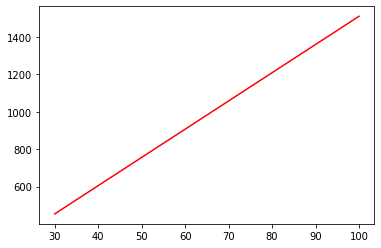

Giá nhà cho 50m^2 là :  [755.676494]


In [8]:
# Linear Regression
numOfIteration = 1000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))

predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()
x1 = 50
y1 = w[0] + w[1] * x1
print('Giá nhà cho 50m^2 là : ', y1)
# Lưu w với numpy.save(), định dạng '.npy'
np.save('weight.npy', w)


from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
# Train mô hình với data giá đất
lrg.fit(x, y)
# Đoán giá nhà đất
y_pred = lrg.predict(x)
plt.plot((x[0], x[-1]),(y_pred[0], y_pred[-1]), 'r')
plt.show()
# Lưu nhiều tham số với numpy.savez(), định dạng '.npz'
np.savez('w2.npz', a=lrg.intercept_, b=lrg.coef_)
# Lấy lại các tham số trong file .npz
k = np.load('w2.npz')
lrg.intercept_ = k['a']
lrg.coef_ = k['b']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in multiply
/home/quan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: setting an array element with a sequence.

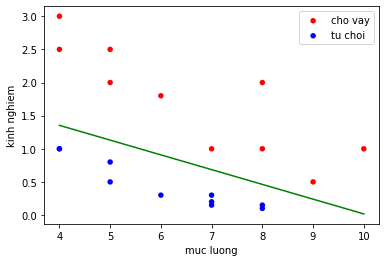

In [24]:
# Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data from file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, : d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
#

#plot data with scatter
plt.scatter(x[:10, 0], x[:10, 1], c = 'red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c = 'blue', edgecolors='none', s=30, label='tu choi')
plt.legend(loc=1)
plt.xlabel('muc luong')
plt.ylabel('kinh nghiem')

# Add 1 column to x
x = np.hstack((np.ones((N,1)), x))
w = np.array([0., 0.1, 0.1]).reshape(-1,1)


numOfIteration = 1000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.1

for i in range(1, numOfIteration):
    y_pred = sigmoid(np.dot(x,w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_pred)) + np.multiply(1-y, np.log(1-y_pred)))

    # gradient descent
    w = w - learning_rate*np.dot(x.T, y_pred - y)


#plot result
t = 0.5
plt.plot((4,10), (-(w[0]+4*w[1] + np.log(1/t-1))/w[2], -(w[0] + 10*w[1] + np.log(1/t-1))/w[2]), 'g')


from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x,y)
wg = np.zeros((4,1))
wg[0,0] = lreg.intercept_
wg[1:, 0] = [i for i in lreg.coef_]
plt.plot((4, 10),(-(wg[0]+4*[1]+ np.log(1/t-1))/wg[2], -(wg[0] + 10*wg[1]+ np.log(1/t-1))/wg[2]), 'g')
plt.show()